In [1]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ImagePredictor
import pandas as pd

/Users/caihaocui/opt/miniconda3/envs/py37automl/lib/python3.7/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
csv_file = ag.utils.download('https://autogluon.s3-us-west-2.amazonaws.com/datasets/petfinder_example.csv')
csv_file

'petfinder_example.csv'

In [3]:
df = pd.read_csv(csv_file)
df.head()

,image,PetID,label
0,petfinder_data/train_images/015da9e87-1.jpg,015da9e87,0
1,petfinder_data/train_images/022606901-1.jpg,022606901,0
2,petfinder_data/train_images/02f89bdcb-1.jpg,02f89bdcb,0
3,petfinder_data/train_images/03f217352-1.jpg,03f217352,0
4,petfinder_data/train_images/040a9a6f9-1.jpg,040a9a6f9,0


In [4]:
train_data, _, test_data = ImagePredictor.Dataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip', train='train', test='test')
print('train #', len(train_data), 'test #', len(test_data))
train_data.head()

data/
├── test/
└── train/
train # 800 test # 80


,image,label
0,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
1,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
2,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
3,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
4,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0


In [5]:
# use the train from shopee-iet as new root
import os 
root = os.path.join(os.path.dirname(train_data.iloc[0]['image']), '..')
all_data = ImagePredictor.Dataset.from_folder(root)
all_data.head()

,image,label
0,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
1,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
2,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
3,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0
4,/Users/caihaocui/.gluoncv/datasets/shopee-iet/...,0


In [6]:
# you can manually split the dataset or use `random_split`
train, val, test = all_data.random_split(val_size=0.1, test_size=0.1)
print('train #:', len(train), 'test #:', len(test))

train #: 634 test #: 76


In [11]:
pets = ag.utils.download('https://autogluon.s3-us-west-2.amazonaws.com/datasets/oxford-iiit-pet-mini.zip')
pets

'oxford-iiit-pet-mini.zip'

In [14]:
pets = ag.utils.unzip(pets)
image_list = [x for x in os.listdir(os.path.join(pets, 'images')) if x.endswith('jpg')]
def label_fn(x):
    return 'cat' if os.path.basename(x)[0].isupper() else 'dog'
new_data = ImagePredictor.Dataset.from_name_func(image_list, label_fn, root=os.path.join(os.getcwd(), pets, 'images'))
new_data

,image,label
0,/Users/caihaocui/Documents/GitHub/autogluon-ka...,0
1,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
2,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
3,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
4,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
...,...,...
95,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
96,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
97,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1
98,/Users/caihaocui/Documents/GitHub/autogluon-ka...,1


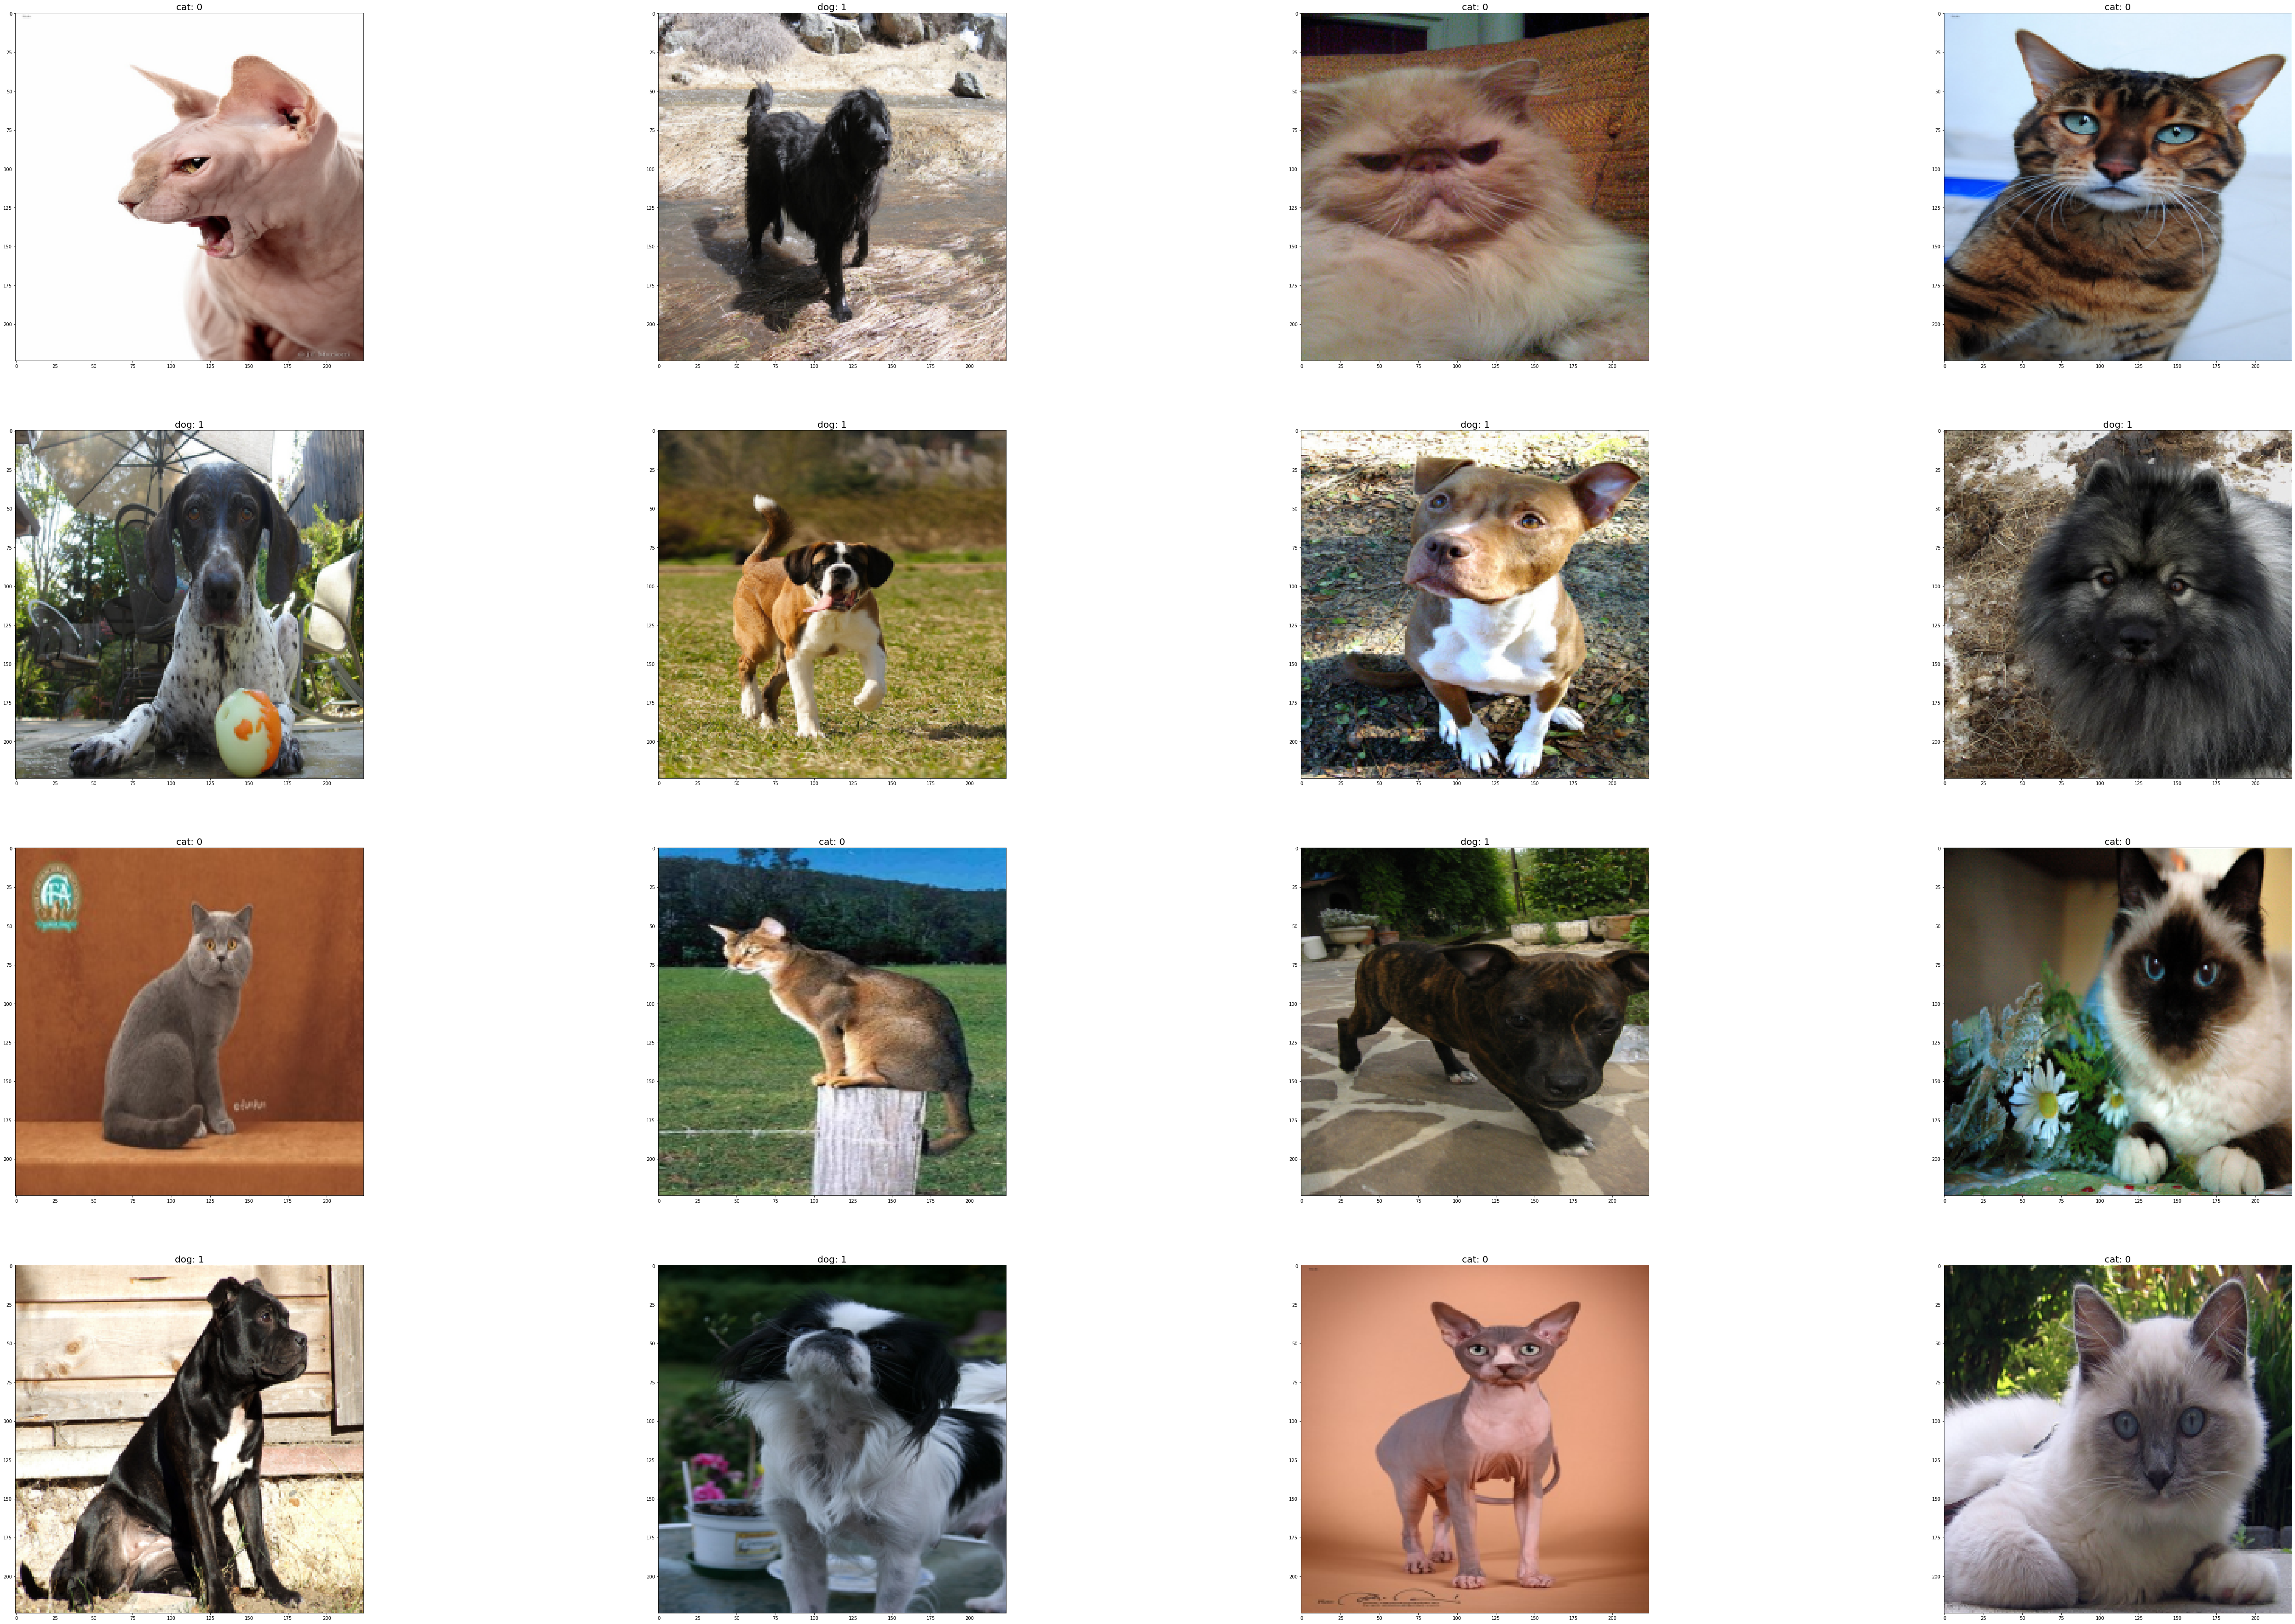

In [15]:
new_data.show_images()